In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import glob
import os

In [2]:
def transient_only(df): 
    'returns df with only noises classified as loud compared to threshold and transient'
    df_transient = df[df['transient']==True]
    df_transient.reset_index(inplace=True)
    return df_transient

In [3]:
def not_transient_only(df): 
    'returns df with only noises classified as loud compared to threshold and that are not transient'
    df_not_transient = df[(df['transient']!=True) & (df['loud']==True)]
    df_not_transient.reset_index(inplace=True)
    return df_not_transient

In [4]:
d = {}  # dictionary that will hold dataframes for each month  
month_array = ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

for month in month_array:  # loop over files

   # read csv into a dataframe and add it to dict with file_name as it key
   d[month] = pd.read_csv(r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Python\Transient Detection\CSV_output_dataframes\\' + month)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#all data for each month 
sep = d['September']
oct = d['October']
nov = d['November']
dec = d['December']
jan = d['January']
feb = d['February']
mar = d['March']
apr = d['April']
may = d['May']

In [6]:
#Ignore June for now, is very wrong.. need to re save down csv 

Text(0, 0.5, 'Average noise per frequency band (dB rel.)')

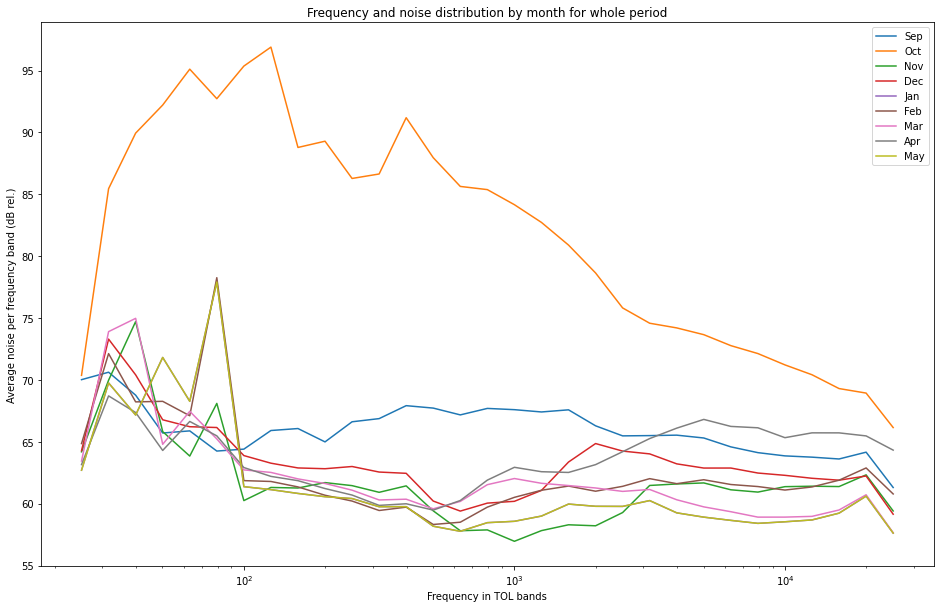

In [7]:
fig,ax = plt.subplots(figsize=(16,10))

#frequencies as floats
freq = sep.drop(['broadband_SPL', 'background', 'loud', 'transient'], axis=1).columns.to_numpy()
freq = freq.astype(np.float)

k = -1
for name in [sep, oct, nov, dec, jan, feb, mar, apr, may]:
    
    # k is random counter for labels on plot
    k = k+1   
    labels = ['Sep', 'Oct', 'Nov','Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    #average noise of each frequency band within a 'transient' event 
    freq_avgs = name.drop(['broadband_SPL', 'background', 'loud', 'transient'], axis=1).mean(axis=0)
    
    #create a dataframe to plot
    freq_dist = pd.DataFrame({'Freq':freq, 'Average Noise':freq_avgs})
    ax.plot(freq_dist['Freq'], freq_dist['Average Noise'], label=labels[k])
    ax.set_xscale('log')
    
plt.legend()

plt.title('Frequency and noise distribution by month for whole period')
plt.xlabel('Frequency in TOL bands')
plt.ylabel('Average noise per frequency band (dB rel.)')
#plt.xlim(0,3000)

Text(0, 0.5, 'Average noise per frequency band (dB rel.)')

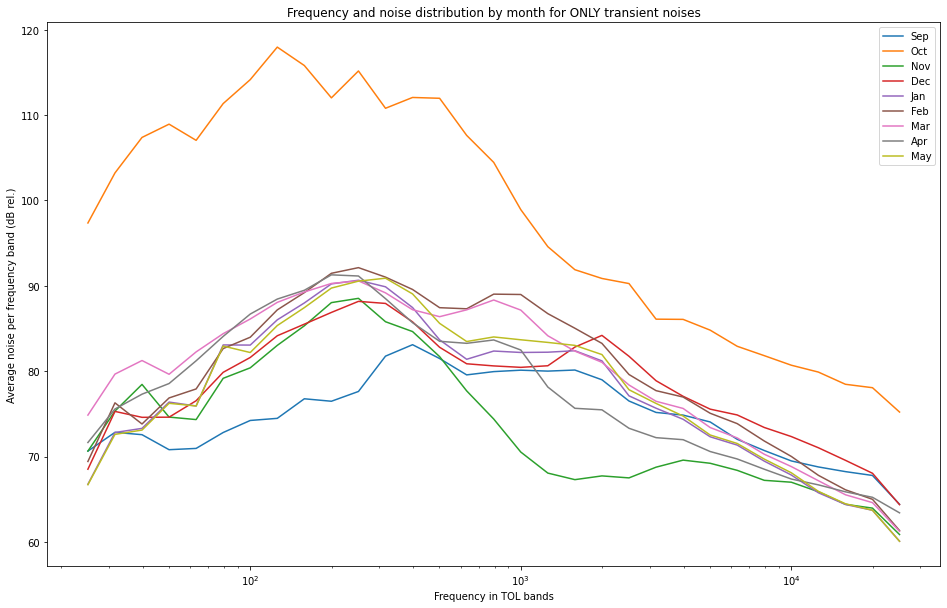

In [8]:
fig,ax = plt.subplots(figsize=(16,10))

#frequencies as floats
freq = sep.drop(['broadband_SPL', 'background', 'loud', 'transient'], axis=1).columns.to_numpy()
freq = freq.astype(np.float)

k = -1

for name in [sep, oct, nov, dec, jan, feb, mar, apr, may]:
    name = transient_only(name)
    
    # k is random counter for labels on plot
    k = k+1   
    labels = ['Sep', 'Oct', 'Nov','Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    #average noise of each frequency band within a 'transient' event 
    freq_avgs = name.drop(['broadband_SPL', 'background', 'loud', 'transient', 'index'], axis=1).mean(axis=0)
    
    #create a dataframe to plot
    freq_dist = pd.DataFrame({'Freq':freq, 'Average Noise':freq_avgs})
    ax.plot(freq_dist['Freq'], freq_dist['Average Noise'], label=labels[k])
    ax.set_xscale('log')
    
plt.legend()

plt.title('Frequency and noise distribution by month for ONLY transient noises')
plt.xlabel('Frequency in TOL bands')
plt.ylabel('Average noise per frequency band (dB rel.)')
#plt.xlim(0,3000)

In [9]:
month_array = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']  #for monthly labels 

#empty lists 
trans_array = [] 
not_trans_array = []

for month in [sep, oct, nov, dec, jan, feb, mar, apr, may]:
    transients = transient_only(month)  #df with just noise classified as transients 
    not_transients = not_transient_only(month)   #df of loud non-transient noises
    
    proportion_transients = (len(transients)/len(month))*100   #percentage as transients 
    proportion_not_transients = (len(not_transients)/len(month))*100   #percentage as non transients 
    
    trans_array.append(proportion_transients)  #append to empty array
    not_trans_array.append(proportion_not_transients)   #append to empty array

#add values to dataframe 
bar_data = pd.DataFrame({'Month':month_array, 'Proportion of transients': trans_array, 'Proportion of not transients': not_trans_array})

Text(0.5, 1.0, 'Noise above threshold level, split into transient noises (<0.5 second duration) and non transient noises (>0.5 second duration)')

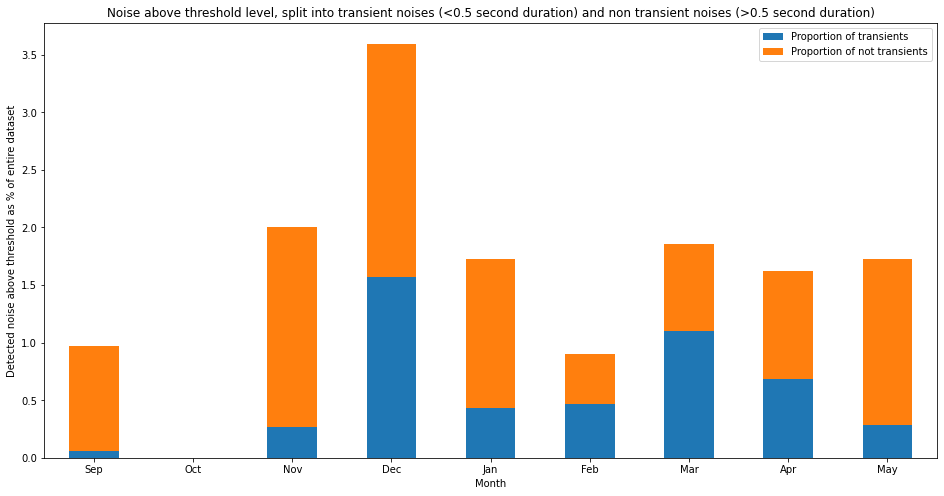

In [10]:
#plotting
ax = bar_data.plot.bar(x='Month', rot=0, figsize=(16, 8), stacked=True)
plt.ylabel('Detected noise above threshold as % of entire dataset')
plt.title('Noise above threshold level, split into transient noises (<0.5 second duration) and non transient noises (>0.5 second duration)')